In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
from scipy.integrate import solve_ivp

***Parallel Reactions in a PFR with Heat Effects***

You can download Fogler's book from here:
https://doku.pub/download/h-scott-fogler-essentials-of-chemical-reaction-engineering-z0x2ze484wqn

(4, 100)

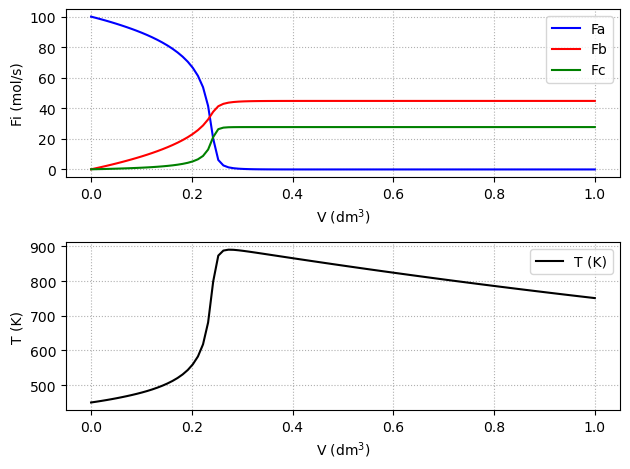

In [20]:
# the rate constant is always temperature dependent
def arr(A, Ea, T):
    
    return A*np.exp((Ea/const.R)*(1/300-1/T))

def simple_reaction(x, y, k):
    
    F = y[:-1]
    T = y[-1]
    
    C = Cto*(F/F.sum())*(To/T)
    
    # rate laws or reaction rate equations
    r1a = -arr(k[0], k[1], T)*C[0]
    r2a = -arr(k[2], k[3], T)*C[0]**2
    
    # net rates or rates of species
    ra = r1a + r2a
    rb = -r1a
    rc = -r2a/2
    
    return np.array([ra, rb, rc, r1a, r2a])

def odes(x, y):
    
    F = y[:-1]
    T = y[-1]
    
    # reaction rates
    ri = simple_reaction(x, y, k)[:3]
    Ri = simple_reaction(x, y, k)[3:]
    
    dF = ri
    
    dT = (Ua*(Ta-T) + (Ri*dH_rj).sum())/(F*Cp_i).sum()
    
    return np.append(dF, dT)

# define constant values
Cto = 0.1 # mol/dm3
To = 373 # K
Ta = 373 # K
Ua = 4000 # J/m3/sec/K

# J/mol A that reacted in reaction 1,2
dH_rj = np.array([-20000, -60000])

# specific heat for the three species
Cp_i = np.array([90, 90, 180])

# arrhenius parameters k0, Ea set
k = np.array([10, 33256, 
              0.09, 74826])

# initial conditions for the the dependent variables (4)
x0 = np.array([100, 0.1, 0.1, 450])

# declare a volume vector (volume window) for independent variable
V = np.linspace(0, 1, 100)

# solution of the od
sol = solve_ivp(odes, [V[0], V[-1]], x0, t_eval = V)

fig, ax = plt.subplots(nrows = 2, dpi = 100)

ax[0].plot(sol.t, sol.y[0,:], "b-", label = "Fa")
ax[0].plot(sol.t, sol.y[1,:], "r-", label= "Fb")
ax[0].plot(sol.t, sol.y[2,:], "g-", label= "Fc")
ax[0].set_ylabel("Fi (mol/s)")
ax[0].set_xlabel("V (dm$^3$)")
ax[0].legend(facecolor='white')
ax[0].grid(linestyle='dotted')

ax[1].plot(sol.t, sol.y[3,:], "k-", label= "T (K)")
ax[1].set_ylabel("T (K)")
ax[1].set_xlabel("V (dm$^3$)")
ax[1].legend(facecolor='white')
ax[1].grid(linestyle='dotted')

fig.tight_layout()